In [ ]:
# CHECK GPU PERFORMANCE
!nvidia-smi

Fri Dec 12 11:57:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r "/content/drive/Shareddrives/CST9-HumanBisyon/Merged_10K.zip" "/content/drive/Shareddrives/CST9-HumanBisyon/Merged_10K"

In [ ]:
!cp -r "/content/drive/Shareddrives/CST9-HumanBisyon/Datasets/Updated_Merged_10K" "/content/Updated_Merged_10K"

In [ ]:
# MOVE FILE TO CONTENT FOR FASTER TRAINING
!rsync -av --ignore-errors "/content/drive/Shareddrives/CST9-HumanBisyon/Merged_10K/" "/content/Merged_10K/"

Streaming output truncated to the last 5000 lines.
labels/0_Parade_Parade_0_126.txt
labels/0_Parade_Parade_0_137.txt
labels/0_Parade_Parade_0_140.txt
labels/0_Parade_Parade_0_145.txt
labels/0_Parade_Parade_0_148.txt
labels/0_Parade_Parade_0_152.txt
labels/0_Parade_Parade_0_156.txt
labels/0_Parade_Parade_0_162.txt
labels/0_Parade_Parade_0_167.txt
labels/0_Parade_Parade_0_181.txt
labels/0_Parade_Parade_0_194.txt
labels/0_Parade_Parade_0_212.txt
labels/0_Parade_Parade_0_222.txt
labels/0_Parade_Parade_0_238.txt
labels/0_Parade_Parade_0_245.txt
labels/0_Parade_Parade_0_248.txt
labels/0_Parade_Parade_0_250.txt
labels/0_Parade_Parade_0_266.txt
labels/0_Parade_Parade_0_272.txt
labels/0_Parade_Parade_0_275.txt
labels/0_Parade_Parade_0_278.txt
labels/0_Parade_Parade_0_283.txt
labels/0_Parade_Parade_0_286.txt
labels/0_Parade_Parade_0_3.txt
labels/0_Parade_Parade_0_315.txt
labels/0_Parade_Parade_0_326.txt
labels/0_Parade_Parade_0_332.txt
labels/0_Parade_Parade_0_353.txt
labels/0_Parade_Parade_0_36

In [ ]:
import os

folder_path = "/content/Updated_Merged_10K"

# Allowed image file extensions
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".gif", ".webp")

count = 0

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.lower().endswith(image_extensions):
            count += 1

print(f"Total image files: {count}")

Total image files: 9222


In [ ]:
import os
import shutil
import random

# Paths
base_path = "/content/Merged_10K"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Destination on shared drive
shredrive_path = "/content/drive/Shareddrives/CST9-HumanBisyon/Datasets/Merged_10K"
train_img = os.path.join(shredrive_path, "train/images")
train_lbl = os.path.join(shredrive_path, "train/labels")
val_img   = os.path.join(shredrive_path, "val/images")
val_lbl   = os.path.join(shredrive_path, "val/labels")

# Create folders if they don't exist
os.makedirs(train_img, exist_ok=True)
os.makedirs(train_lbl, exist_ok=True)
os.makedirs(val_img, exist_ok=True)
os.makedirs(val_lbl, exist_ok=True)

# Get all image filenames
images = [f for f in os.listdir(images_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(images)

# 80/20 split
split_index = int(0.8 * len(images))
train_files = images[:split_index]
val_files = images[split_index:]

# Function to copy images and labels
def copy_files(file_list, dest_img, dest_lbl):
    for img_file in file_list:
        img_src = os.path.join(images_path, img_file)
        lbl_src = os.path.join(labels_path, img_file.rsplit(".", 1)[0] + ".txt")

        img_dst = os.path.join(dest_img, img_file)
        lbl_dst = os.path.join(dest_lbl, os.path.basename(lbl_src))

        shutil.copy(img_src, img_dst)
        if os.path.exists(lbl_src):
            shutil.copy(lbl_src, lbl_dst)

# Copy train and val
copy_files(train_files, train_img, train_lbl)
copy_files(val_files, val_img, val_lbl)

# Summary
print("DONE! Train/Val split copied to Shared Drive.")
print(f"Train images: {len(train_files)}")
print(f"Val images: {len(val_files)}")


DONE! Train/Val split copied to Shared Drive.
Train images: 8000
Val images: 2000


In [ ]:
import os
import shutil
import random

base_path = "/content/Merged_10K"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

# Create destination folders
train_img = os.path.join(base_path, "train/images")
train_lbl = os.path.join(base_path, "train/labels")
val_img   = os.path.join(base_path, "val/images")
val_lbl   = os.path.join(base_path, "val/labels")

os.makedirs(train_img, exist_ok=True)
os.makedirs(train_lbl, exist_ok=True)
os.makedirs(val_img, exist_ok=True)
os.makedirs(val_lbl, exist_ok=True)

# Get all image filenames
images = [f for f in os.listdir(images_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(images)

# 80/20 split
split_index = int(0.8 * len(images))
train_files = images[:split_index]
val_files = images[split_index:]

def move_files(file_list, dest_img, dest_lbl):
    for img_file in file_list:
        img_src = os.path.join(images_path, img_file)
        lbl_src = os.path.join(labels_path, img_file.replace(".jpg", ".txt").replace(".png", ".txt"))

        img_dst = os.path.join(dest_img, img_file)
        lbl_dst = os.path.join(dest_lbl, os.path.basename(lbl_src))

        shutil.copy(img_src, img_dst)
        if os.path.exists(lbl_src):
            shutil.copy(lbl_src, lbl_dst)

move_files(train_files, train_img, train_lbl)
move_files(val_files, val_img, val_lbl)

print("DONE! Train/Val split created.")
print(f"Train images: {len(train_files)}")
print(f"Val images: {len(val_files)}")

DONE! Train/Val split created.
Train images: 8000
Val images: 2000


In [ ]:
!apt-get install -q tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (102 kB/s)
Selecting previously unselected package tree.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# CONFIGURING AND CREATING YAML FILE
import yaml

data_yaml = {
    'train': '/content/Updated_Merged_10K/train/images',
    'val': '/content/Updated_Merged_10K/val/images',
    'nc': 1,
    'names': ['Human face']
}

with open('/content/Updated_Merged_10K/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("data.yaml updated!")


data.yaml updated!


In [ ]:
# DOWNLOAD ULTRALYTICS BEFORE TRAINING
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00


In [ ]:
# ------------------------------
# YOLOv8 TRAINING WITH AUTO BACKUP
# ------------------------------

from ultralytics import YOLO
import shutil
import glob
import os

# ------------------------------
# 1️⃣ Initialize YOLO model
# ------------------------------
model = YOLO("yolov8s.pt")  # Pretrained model

# ------------------------------
# 2️⃣ Train the model
# ------------------------------
results = model.train(
    data="/content/Updated_Merged_10K/data.yaml",
    epochs=40,
    imgsz=512,          # Image size
    batch=16,           # Batch size
    patience=10,        # Early stopping
    workers=2,          # Data loading workers
    save_dir="/content/drive/MyDrive/yolo_runs"  # Save directly to Drive
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.236 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Updated_Merged_10K/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7

In [ ]:
!pip install seaborn matplotlib

Model loaded successfully!
Using validation images from: /content/Updated_Merged_10K/val/images
WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Finished collecting labels!


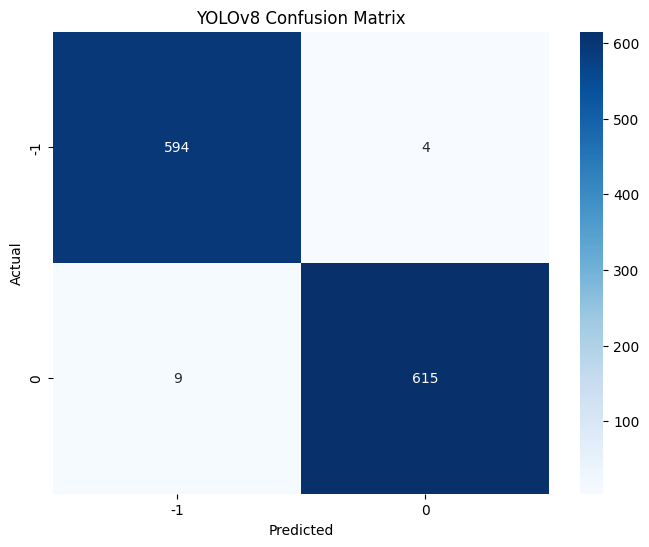

In [ ]:
# CONFUSION MATRIX
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix

# ==================================
# LOAD YOLO MODEL
# ==================================
model = YOLO("/content/best-yolov8s-v2.pt")
print("Model loaded successfully!")

# ==================================
# CORRECT DATASET PATHS
# ==================================
images_dir = "/content/Updated_Merged_10K/val/images"
labels_dir = "/content/Updated_Merged_10K/val/labels"

print("Using validation images from:", images_dir)

# ==================================
# RUN PREDICTIONS
# ==================================
results = model.predict(images_dir, save=False, verbose=False)

y_true = []
y_pred = []

# ==================================
# COLLECT TRUE + PREDICTED LABELS
# ==================================
for r in results:
    # predicted class
    if len(r.boxes.cls) > 0:
        pred_class = int(r.boxes.cls[0].item())
    else:
        pred_class = -1  # no detection

    # match label file
    img_name = os.path.basename(r.path)
    label_name = os.path.splitext(img_name)[0] + ".txt"
    label_path = os.path.join(labels_dir, label_name)

    # true class
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            line = f.readline().strip().split()
            cls_id = int(line[0]) if line else -1
    else:
        cls_id = -1

    y_true.append(cls_id)
    y_pred.append(pred_class)

print("Finished collecting labels!")

# ==================================
# CONFUSION MATRIX
# ==================================
labels = sorted(list(set(y_true + y_pred)))
cm = confusion_matrix(y_true, y_pred, labels=labels)

# ==================================
# PLOT MATRIX
# ==================================
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("YOLOv8 Confusion Matrix")
plt.show()